**NOTA: CAMBIÉ A UN ENTORNO DE EJECUCIÓN EN LOCAL, PARA APROVECHAR EL MAYOR RENDIMIENTO DE MI ORDENADOR.**

**HE EDITADO UN POWERPOINT EN EL QUE SE REFLEJAN LOS RESULTADOS DE DOS PRUEBAS SIN TRANSFER LEARNING ANTERIORES. LO ADJUNTO JUNTO CON LOS DOS CUADERNOS CORRESPONDIENTES DEL EJERCICIO. MUCHAS GRACIAS Y PERDÓN POR LAS MOLESTIAS.**

# **Detección de Neumonía en Radiografías de Tórax**



## **Importación de Librerías/Descarga de Datos**

Procedemos a importar todas aquellas librerías y métodos necesarios, para cada una de los siguientes apartados del ejercicio:

- Exploración y Partición de los Datos. 
- Procesado de Imágenes. 
- Arquitectura de la Red Convolucional.
- Aumento de Datos.
- Entrenamiento del Modelo y Visualización.
- Resultados Obtenidos.
- Visualización de Mapas de Sensibilidades (Heatmaps)

In [ ]:
#COLAB = True

In [ ]:
#!pip install h5py==2.10.0

In [ ]:
from keras.models import Sequential, load_model, Model
from keras.layers import (Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation,
                          BatchNormalization)
from keras import backend as K
from keras import regularizers
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.regularizers import L1, L2, L1L2

from IPython.display import SVG, clear_output
from keras.utils.vis_utils import model_to_dot

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array
from sklearn.metrics import classification_report, roc_curve, auc

import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from glob import glob

%matplotlib inline

In [ ]:
#if COLAB:
    #id_ = "1MuAnWSme9Hp-bQD8sN9OeLoxR-cxojQv"
    #aux = "'https://docs.google.com/uc?export=download&id={}&confirm=t'".format(id_)
    #!wget $aux -O ./Kermanyetal.zip
    #!unzip -qq ./Kermanyetal.zip

In [ ]:
!ls

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [ ]:
!ls chest_xray

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [ ]:
!ls chest_xray/train

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [ ]:
!ls chest_xray/val

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [ ]:
!ls chest_xray/val/NORMAL

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [ ]:
!ls chest_xray/val/PNEUMONIA

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [ ]:
!ls chest_xray/test

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [ ]:
aux = !ls chest_xray/train/PNEUMONIA
aux[:10]

['"ls" no se reconoce como un comando interno o externo,',
 'programa o archivo por lotes ejecutable.']

## **Exploración y Partición de los Datos**

- Definimos diversas variables, en las que iremos volcando las rutas de origen de las imagenes según su tipo (normal/neumonía) y uso en el modelado (train/validación/test).

- También cabe destacar el uso del módulo "glob" para agrupar en nuevas variables, todos aquellos archivos que corresponden a las rutas marcadas anteriormente.

In [ ]:
aux1 = "desktop/chest_xray/train/NORMAL/*"
aux2 = "desktop/chest_xray/val/NORMAL/*"
aux3 = "desktop/chest_xray/train/PNEUMONIA/*"
aux4 = "desktop/chest_xray/val/PNEUMONIA/*"

ficheros_trainval_NORMAL    = glob(aux1) + glob(aux2)
ficheros_trainval_PNEUMONIA = glob(aux3) + glob(aux4)
ficheros_trainval = ficheros_trainval_NORMAL + ficheros_trainval_PNEUMONIA
y_trainval = len(ficheros_trainval_NORMAL)*["normal"] + len(ficheros_trainval_PNEUMONIA)*["pneumonia"]

aux1 = "desktop/chest_xray/test/NORMAL/*"
aux2 = "desktop/chest_xray/test/PNEUMONIA/*"
ficheros_test_NORMAL    = glob(aux1)
ficheros_test_PNEUMONIA = glob(aux2)
ficheros_test = ficheros_test_NORMAL + ficheros_test_PNEUMONIA
y_test = len(ficheros_test_NORMAL)*["normal"] + len(ficheros_test_PNEUMONIA)*["pneumonia"]

In [ ]:
y_trainval

['normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',

- Creamos y consolidamos dos dataset (df_trainval y df_test) en los que registramos las agrupaciones de imágenes generadas anteriormente. 

In [ ]:
df_trainval = pd.DataFrame({"filepath":ficheros_trainval, "class":y_trainval})
df_test     = pd.DataFrame({"filepath":ficheros_test, "class":y_test})
df_trainval

,filepath,class
0,desktop/chest_xray/train/NORMAL\IM-0115-0001.jpeg,normal
1,desktop/chest_xray/train/NORMAL\IM-0117-0001.jpeg,normal
2,desktop/chest_xray/train/NORMAL\IM-0119-0001.jpeg,normal
3,desktop/chest_xray/train/NORMAL\IM-0122-0001.jpeg,normal
4,desktop/chest_xray/train/NORMAL\IM-0125-0001.jpeg,normal
...,...,...
5227,desktop/chest_xray/val/PNEUMONIA\person1949_ba...,pneumonia
5228,desktop/chest_xray/val/PNEUMONIA\person1950_ba...,pneumonia
5229,desktop/chest_xray/val/PNEUMONIA\person1951_ba...,pneumonia
5230,desktop/chest_xray/val/PNEUMONIA\person1952_ba...,pneumonia


- Procedemos a establecer nuestros 2 primeros conjuntos de modelado (train y validación) a partir de uno solo de los datasets generados anteriormente (df_trainval). Nos reservamos df_test para comprobaciones posteriores. 

- A continuación verificamos la distribución de imágenes, según su tipo, en nuestros conjuntos de test y validación.


In [ ]:
problem_name = "normalVSpneumonia"
random_state = 0

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df_trainval, test_size=0.3, random_state=random_state,
                                    stratify=df_trainval["class"])

In [ ]:
100*pd.value_counts(df_trainval["class"]) / len(df_trainval)

pneumonia    74.216361
normal       25.783639
Name: class, dtype: float64

In [ ]:
100*pd.value_counts(df_train["class"]) / len(df_train)

pneumonia    74.221737
normal       25.778263
Name: class, dtype: float64

In [ ]:
100*pd.value_counts(df_val["class"]) / len(df_val)

pneumonia    74.203822
normal       25.796178
Name: class, dtype: float64

In [ ]:
100*pd.value_counts(df_test["class"]) / len(df_test)

pneumonia    62.5
normal       37.5
Name: class, dtype: float64

## **Procesado de Imágenes**

- Visualizamos una de nuestras imágenes en su formato original junto con sus valores dimensionales.

(1384, 1167)


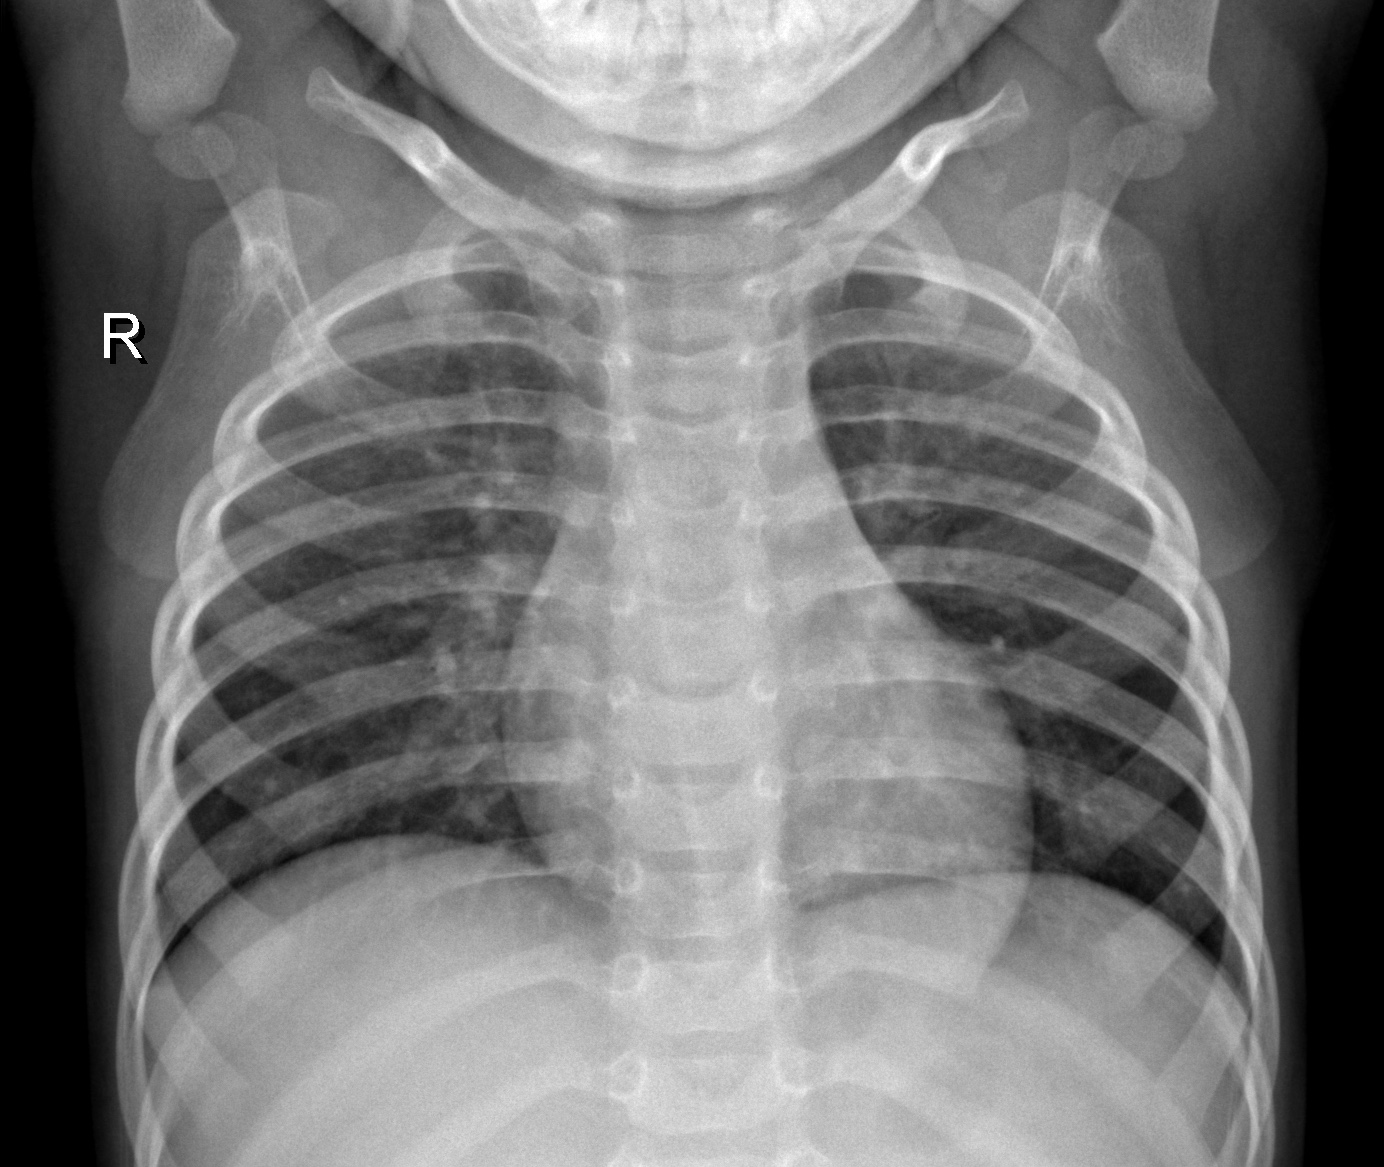

In [ ]:
imagen = load_img(ficheros_trainval[7])
print(imagen.size)
imagen

In [ ]:
type(imagen)

PIL.Image.Image

In [ ]:
np.array(imagen).shape

(1167, 1384, 3)

In [ ]:
batch_size = 32

Más adelante, tras establecer la arquitectura de nuestra red de modelado, describiremos y utilizaremos la técnica de aumento de datos ("data augmentation"). A continuación se muestra un ejemplo de uso y visualización: 

In [ ]:
# data augmentation:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=.2,
                                   zoom_range=0.05,
                                   rotation_range=2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode='nearest')

In [ ]:
imagen_num = np.array([img_to_array(imagen)])

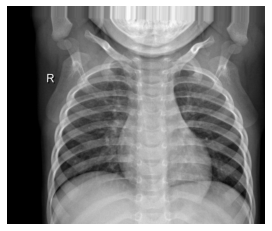

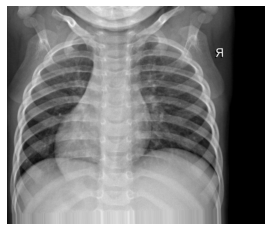

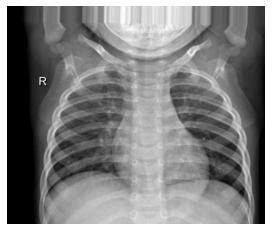

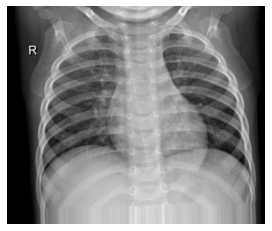

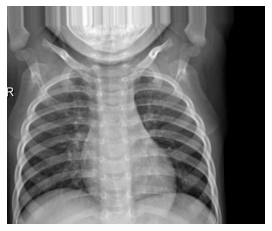

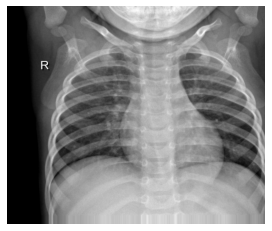

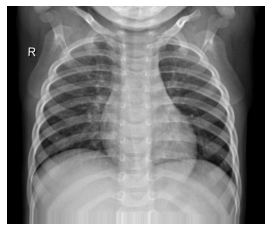

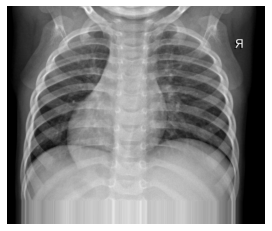

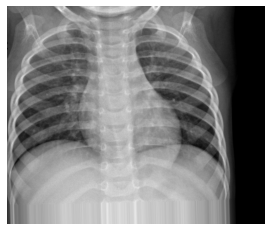

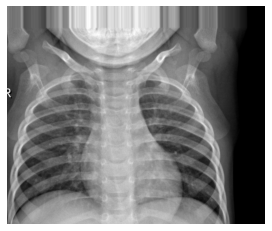

In [ ]:
for _ in range(10):
    plt.imshow(train_datagen.flow(imagen_num)[0][0])
    plt.axis("off")
    plt.show()

## **Arquitectura de la Red Convolucional**

### **1ª Sección**

No podemos utilizar simplemente una red neuronal profunda con capas completamente conectadas, para las tareas de reconocimiento de imágenes. Por desgracia, aunque eso funciona bien para imágenes pequeñas, se viene abajo para imágenes grandes, debido al número enorme de parámetros que requiere. Las redes convolucionales solucionan este problema utilizando capas parcialmente conectadas y los pesos compartidos. 

En primer lugar vamos a fijar las dimensiones de nuestras imágenes de entrada. Reducir dichas dimensiones favorece a un menor sobreajuste. Pero no podemos ajustarlas demasiado, para evitar perder información o detalles relevantes.

In [ ]:
img_width, img_height = 75, 75

normed_dims = (img_height, img_width)

In [ ]:
normed_dims

(75, 75)

A continuación procederemos a establecer la primera parte de la arquitectura de nuestra red. Que va incluir tres conjuntos secuenciados de hasta cuatro tipos de capas:

*   Capa convolucional (Convolutional) que crea imágenes filtradas de la imagen que recibe. Dicho filtro se centra en la extracción de una característica concreta. Lo hacemos estableciendo el correspodiente número de filtros (32 o 64), tamaño de Kernel (3, 3) y función de activación (relu). 

  En la primera de las capas convolucionales también fijamos el formato de las imágenes de entrada que recibimos. En principio las pruebas de Padding y Stride no aportaron mejoras en el resultado.   

*   Capa de agrupación (Pooling) que crea versiones de baja resolución de las imágenes que recibe, añadiendo cierta robustez a su tratamiento. Su objetivo es submuestrear la imagen para disminuir la carga computacional, el uso de memoria y el número de parámetros (limitando así el riesgo de sobreajuste). Obligando a la siguiente capa a centrarse en la extracción de las características más globales. 

  También fijamos su tipo de agrupación (max-pooling) y el factor de reducción de escala con el que ajustamos las imágenes. 

*   Capa de ruído (Dropout) que desactiva un numero de neuronas de forma aleatoria. Este método ayuda a reducir el overfitting, ya que las neuronas cercanas suelen aprender patrones que se relacionan y estas relaciones pueden llegar a formar un patron muy especifico con los datos de entrenamiento. Con dropout esta dependencia entre neuronas es menor en toda la red neuronal. 

  Tiene un parametro que indica la probabilidad de que las neuronas se queden activadas, este paremetro toma valores de 0 a 1. 0.5 suele usarse por defecto indicando que la mitad de las neuronas se quedaran activadas, si los valores son cercanos a 0 dropout desactivara menos neuronas, si es cercano a 1 desactivara muchas más neuronas.

*   Capa de aplanado (Flattening) puede considerarse como una capa separada de esta 1ª sección de la arquitectura. Ya que ejerce como transición entre la etapa de extracción de características y la etapa de clasificación, que opera con capas densas (2ª sección de la arquitectura). Convierte un conjunto de imágenes en un único vector. 

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', 
                 input_shape=normed_dims+(1,)))
model.add(MaxPooling2D((2,2))) 
model.add(Dropout(0.1))
 
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

### **2ª Sección**

Ahora debemos procesar cada uno de los vectores de entrada. Para ello establecemos dos conjuntos que incluyen los siguientes tipos de capa:

* Capa de ruido (Dropout): al igual que en la primera sección de la red, 
desactiva un numero de neuronas de forma aleatoria para reducir el       sobreajuste.

*   Capa densa poco profunda (Non-Deep/Shallow) en la que cada neurona procesa todas las salidas de la capa anterior. La primera de estas capas se activa mediante la función "relu" y devuelve otro vector ajustado en número de parámetros. 

    De igual manera podemos emplear un regularizador('kernel_regularizer') para aplicar una penalización en el núcleo de la capa. Esta penalización se suma a la función de pérdida que la red optimiza. Para este caso empleamos una de tipo L2 (Ridge) para disminuir los pesos. 
    
    La segunda y última capa densa poco profunda (con dos neuronas) se activa mediante "softmax" como paso previo al compilado del modelo. Dicha función es apropiada para clasificar y devuelve resultados normalizados, excluyentes y que suman 1 (probabilidad de tener neumonía o no).   

*   Por último determinamos el compilado de nuestro modelo (Compile). En el que fijamos la función de coste o pérdida ('categorical_crossentropy') válida para nuestra tarea de clasificación. De igual manera marcamos el tipo de optimizador ('Adam') junto con su tasa de aprendizaje ('learning_rate'). 

    La tasa de aprendizaje es un hiperparámetro que controla cuánto va a cambiar el modelo en respuesta al error estimado, cada vez que se actualicen los pesos del modelo. La elección de la tasa de aprendizaje es un reto, ya que un valor demasiado pequeño puede dar lugar a un largo proceso de entrenamiento que podría atascarse. Mientras que un valor demasiado grande puede dar lugar al aprendizaje de un conjunto subóptimo de pesos demasiado rápido o a un proceso de entrenamiento inestable. 



In [ ]:
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=L2(.05)))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.adam_v2.Adam(learning_rate=0.0002),
              metrics=['accuracy'])

A continuación sumarizamos nuestro modelo para comprobar los cambios que ejercen cada una de las capas de nuestra red. Tanto en el número de parámetros como en las dimensiones de las imágenes (en la primera sección) y en sus vectores resultantes (en la segunda sección).

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 73, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 36, 36, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 17, 17, 32)        0

## Aumento de Datos

En primer lugar aumentamos las dimensiones de nuestro array de imágenes, dando cabida al aumento del conjunto de imágenes posterior.

In [ ]:
preprocess_input = lambda x:np.expand_dims(x.mean(axis=-1) / x.mean(), -1)

In [ ]:
preprocess_input(imagen_num).shape

(1, 1167, 1384, 1)

Debemos ampliar el tamaño de nuestros conjuntos de imágenes. Con el objetivo de mejorar la capacidad de aprendizaje y el rendimiento de nuestro modelo. 

Para conseguirlo contamos con la técnica de aumento de datos a través del método 'ImageDataGenerator'. Que nos permite generar las nuevas imágenes a partir de una imagen original y en función del ajuste de diversas características. Vamos a describir los parámetros que hemos utilizado para aumentar nuestro conjunto de entrenamiento:

- shear_range: marca el ángulo de cizallamiento de la imagen. 

- zoom_range: determina un rango aleatorio de zoom.

- rotation_range: fija un rango aleatorio de rotación.

- width_shift_range y height_shift_range: La imagen se desplaza en base de los parámetros marcados. 

- horizontal_flip y vertical_flip: La imagen se voltea en base de los parámetros marcados. 

- bright_range: escala de variación de brillo de la imagen.

- fill_mode: modo de relleno de los puntos que se encuentran fuera de los límites de la entrada. 

También aumentamos nuestros conjuntos de validación y test. Aunque sin modificar los datos de las nuevas imágenes. Ya que únicamente es el conjunto de entrenamiento el que precisa de imágenes modificadas, para mejorar el aprendizaje de nuestro modelo. 

In [ ]:
train_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function = preprocess_input,
    shear_range=.15,
    zoom_range=0.15,
    rotation_range=6,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range = (0.5, 0.9),
    fill_mode='constant')

val_datagen  = ImageDataGenerator(dtype='float32',
                                  preprocessing_function = preprocess_input)

test_datagen = ImageDataGenerator(dtype='float32',
                                  preprocessing_function = preprocess_input)

## Entrenamiento del Modelo y Visualización

- Establecemos y verificamos nuestras variables de modelado a partir de los diferentes conjuntos de datos.

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col = "filepath",
    y_col = "class",
    target_size=normed_dims,
    batch_size=batch_size,
    shuffle=True,
    color_mode="grayscale",
    class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col = "filepath",
    y_col = "class",
    target_size=normed_dims,
    batch_size=batch_size,
    shuffle=False,
    color_mode="grayscale",
    class_mode='categorical')

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col = "filepath",
    y_col = "class",
    target_size=normed_dims,
    batch_size=batch_size,
    shuffle=False,
    color_mode="grayscale",
    class_mode='categorical')

Found 3662 validated image filenames belonging to 2 classes.
Found 1570 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'normal': 0, 'pneumonia': 1}

In [ ]:
number_train_samples = train_generator.n
number_val_samples   = validation_generator.n
number_test_samples  = test_generator.n

number_train_samples, number_val_samples, number_test_samples

(3662, 1570, 624)

- A continuación definimos la función encargada de visualizar las tasas de acierto y pérdida de nuestro modelo.

In [ ]:
from matplotlib.ticker import MaxNLocator
from IPython.display import clear_output

def grafica_entrenamiento(tr_acc, val_acc, tr_loss, val_loss,
                          figsize=(10,4)):
    #best_i = np.argmax(val_acc)
    best_i = np.argmin(val_loss)
    plt.figure(figsize=figsize)
    ax = plt.subplot(1,2,1)
    plt.plot(1+np.arange(len(tr_acc)),  100*np.array(tr_acc))
    plt.plot(1+np.arange(len(val_acc)), 100*np.array(val_acc))
    plt.plot(1+best_i, 100*val_acc[best_i], 'or')
    plt.title('tasa de acierto del modelo (%)', fontsize=18)
    plt.ylabel('tasa de acierto (%)', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.subplot(1,2,2)
    plt.plot(1+np.arange(len(tr_acc)), np.array(tr_loss))
    plt.plot(1+np.arange(len(val_acc)), np.array(val_loss))
    plt.plot(1+best_i, val_loss[best_i], 'or')
    plt.title('loss del modelo', fontsize=18)
    plt.ylabel('loss', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

In [ ]:
acum_tr_acc = []
acum_val_acc = []
best_val_acc = -1000
acum_tr_loss  = []
acum_val_loss = []

In [ ]:
number_val_samples

1570

In [ ]:
batch_size

32

- Fijamos el número de épocas de entrenamiento de nuestro modelo y declaramos una nueva variable, en la que se va registrando el mejor resultado obtenido en validación.  

In [ ]:
epochs = 100

modelpath = "best_model_{}_random_state_{}.h5".format(problem_name, random_state)

checkpoint = ModelCheckpoint(modelpath, monitor='val_loss', verbose=1,
                             save_best_only=True,
                             mode='min')

serie_tr_acc = []
serie_val_acc = []
serie_tr_loss  = []
serie_val_loss = []

In [ ]:
#epochs = 10

- Establecemos un bucle que va a recorrer todas las épocas fijadas anteriormente. 

- A lo largo de cada época vamos entrenando el modelo, registrando los resultados de "accuracy" y "loss" sobre nuestros conjuntos de entrenamiento y validación. 

- Por último mostramos la evolución de la tasa de acierto ('accuracy') y pérdida del modelo ('loss'), gracias a la función 'grafica_entrenamiento' definida anteriormente.

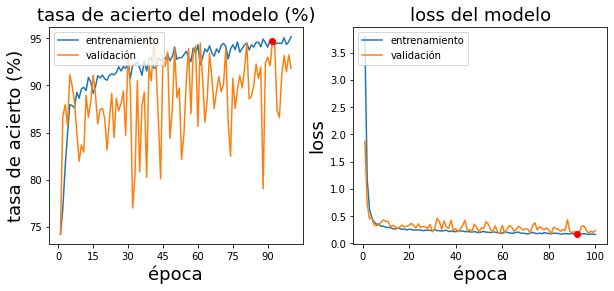

In [ ]:
for e in range(epochs):
    salida = model.fit(train_generator,  
                        steps_per_epoch=number_train_samples // batch_size,
                        epochs=1,
                        callbacks=[checkpoint],
                        verbose=1,
                        shuffle = True,
                        validation_data=validation_generator,
                        validation_steps=number_val_samples // batch_size
                       )
    
    serie_tr_acc.append(salida.history["accuracy"][0])
    serie_val_acc.append(salida.history["val_accuracy"][0])
    serie_tr_loss.append(salida.history["loss"][0])
    serie_val_loss.append(salida.history["val_loss"][0])
    
    clear_output()
    grafica_entrenamiento(serie_tr_acc, serie_val_acc,
                          serie_tr_loss, serie_val_loss)

- **Podemos comprobar que alcanzamos altas tasas de acierto para nuestro modelo, con picos en torno al 95%.**

- **De igual manera obtenemos tasas de pérdidas muy ajustadas y contenidas a los largo de todas las épocas de entrenamiento.**

- **Hemos reducido paulatinamente la aparición de sobreajuste en el acierto del modelo. Seguramente un mayor número de pruebas en la configuración de la arquitectura de la red o del aumento de datos, habría desembocado en una mayor disminución del overfitting.**

- **Lás perdidas del modelo muestran un sobreajuste muy acotado entre entrenamiento y validación, reflejando una notable eficacia de nuestro modelo.**

In [ ]:
model = load_model(modelpath)

## **Resultados Obtenidos**

- Tras ajustar y entrenar nuestro modelo, vamos a evaluarlo. Para ello empleamos el método "evaluate" sobre nuestros conjuntos generadores de entrenamiento, validación y test consolidados anteriormente. Dicho método devuelve los valores de "loss" y la métrica "accuracy" correspondientes a cada conjunto.

In [ ]:
scores_tr = model.evaluate(train_generator)
print('Train loss    :', scores_tr[0])
print('Train accuracy:', scores_tr[1])
print()

scores_val = model.evaluate(validation_generator)
print('Val loss    :', scores_val[0])
print('Val accuracy:', scores_val[1])
print()

scores_te = model.evaluate(test_generator)
print('Test loss     :', scores_te[0])
print('Test accuracy :', scores_te[1])

115/115 [==============================] - 20s 175ms/step - loss: 0.1934 - accuracy: 0.9391
Train loss    : 0.19340991973876953
Train accuracy: 0.9391043186187744

50/50 [==============================] - 8s 156ms/step - loss: 0.1703 - accuracy: 0.9478
Val loss    : 0.17031772434711456
Val accuracy: 0.9477707147598267

20/20 [==============================] - 3s 142ms/step - loss: 0.3930 - accuracy: 0.8526
Test loss     : 0.3930450677871704
Test accuracy : 0.8525640964508057


In [ ]:
np.mean(train_generator.classes), np.mean(validation_generator.classes), np.mean(test_generator.classes)

(0.742217367558711, 0.7420382165605095, 0.625)

**A partir de los resultados podemos establecer que:**

- **Obtenemos unos valores entrenamiento y validación bastante aceptables y muy parecidos entre sí. Gracias a una definición de arquitectura compensada, con ajustes razonables de las capas y sus argumentos. Al igual que un aumento de datos (imágenes) que ha beneficiado el entrenamiento de nuestro modelo.**

- **El resultado del test es algo peor, tal y como podíamos preveer a partir del sobreajuste reflejado en las visualizaciones de tasas de acierto y error. Una mayor experimentación con el número de neuronas, factores de regularización , ruido o los parámetros de "data augmentation" sin duda podría aumentar la eficacia de nuestro modelo.**

- **Como también era de esperar, la diferencia entre las definiciones de atributos de nuestros conjuntos ("classes") son algo más pronunciadas.**

Por último obtenemos una clasificación de predicciones, sobre nuestro conjunto de test y gracias al método "predict_generator". Sus resultados son ciertamente notables (recall 0.96 - f1 0.92 - accuracy 0.90) confirmando la validez de dichas predicciones.

In [ ]:
y_real = np.array(test_generator.classes)
y_pred_proba = model.predict_generator(test_generator)
y_pred = np.argmax(y_pred_proba, axis=1)
print('')
print(classification_report(y_real, y_pred))

C:\Users\juana\AppData\Local\Temp\ipykernel_5360\2543064912.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_proba = model.predict_generator(test_generator)



              precision    recall  f1-score   support

           0       0.94      0.65      0.77       234
           1       0.82      0.97      0.89       390

    accuracy                           0.85       624
   macro avg       0.88      0.81      0.83       624
weighted avg       0.87      0.85      0.85       624



Nos encontramos ante un dataset bastante desbalanceado entre los casos positivos y negativos de neumonía. Por lo que es aconsejable visualizar una curva ROC que cruce las predicciones de positivos verdaderos y falsos: 

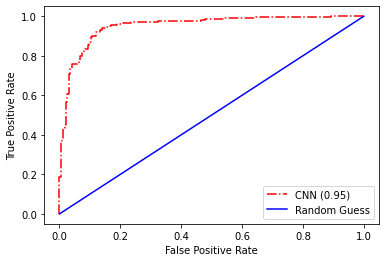

In [ ]:
clase_positiva = 1
fpr, tpr, thresholds = roc_curve(y_real==clase_positiva, y_pred_proba[:,clase_positiva])
fig, ax1 = plt.subplots(1,1)
ax1.plot(fpr, tpr, 'r-.', label = 'CNN (%2.2f)' % auc(fpr, tpr))
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
ax1.legend();

A partir de esta curva podemos llegar a las siguientes conclusiones:

- **Obtenemos un área (0.95) por debajo de una curva ROC muy elevada y vertical desde el inicio. Este hecho refleja la eficacia de nuestro modelo a la hora de detectar positivos verdaderos de neumonía (objetivo fundamental en este caso de estudio).**

- **Al inicio de la curva observamos un indice cercano a 0.6 para TP y de prácticamente 0.0 para FP, lo que habla muy bien de la precisión de nuestro modelo desde un primer momento.**

- **Recordamos que esta curva no se encuentra influenciada por la frecuencia de las clases, por lo que los resultados de su métrica nos son bastante favorables.**

A continuación se va a rescatar una imagen de ejemplo del conjunto de test original, junto con el cálculo correspondiente de probabilidad de neumonía. 

In [ ]:
test_datagen2 = ImageDataGenerator(dtype='float32', preprocessing_function = preprocess_input)

test_generator2 = test_datagen2.flow_from_dataframe(
    dataframe=df_test,
    x_col = "filepath",
    y_col = "class",
    target_size=normed_dims,
    batch_size=len(df_test),
    shuffle=False,
    color_mode="grayscale",
    class_mode='categorical'
    )

Found 624 validated image filenames belonging to 2 classes.


In [ ]:
test_generator2.reset()
X_te, y_te = test_generator2.next()

In [ ]:
test_generator2.class_indices

{'normal': 0, 'pneumonia': 1}

1/1 [==============================] - 0s 68ms/step
Probabilidad pneumonía: 1.8e+01%


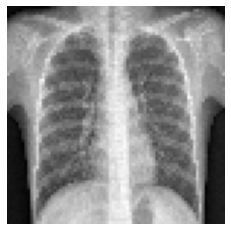

In [ ]:
ind_te1 = 14

image = X_te[ind_te1].copy()

plt.imshow(image[:,:,0], cmap='gray')
plt.axis("off")
p = model.predict(np.array([image]))[0,1]
print("Probabilidad pneumonía: {:2.2}%".format(100*p))

## **GradCam:**

(de https://medium.com/analytics-vidhya/visualizing-activation-heatmaps-using-tensorflow-5bdba018f759)

1- Calcular para una imagen la salida del modelo y la salida de la última capa convolucional

2- Encuentrar la neurona de salida más activa (que es la que determina la clase predicha)

3- Calcular el gradiente de dicha neurona de salida con respecto a la última capa convolucional

3- Promediar y pesar esto con la salida de la última capa convolucional

4- Normalizar entre 0 y 1 para visualizar

5- Convertir a RGB y superponerla a la imagen original

###**Funciones que calculan la sensibilidad de la salida a la entrada:**

In [ ]:
!pip3 install opencv-python

In [ ]:
import tensorflow as tf
import cv2

def find_ind_last_conv2D(model):
    ind_last_conv2D_layer = None
    for i,x in enumerate(model.layers):
        if x.__class__.__name__ == "Conv2D":
            ind_last_conv2D_layer = i
    return ind_last_conv2D_layer


def show_heatmap(model, im):
    imag = np.expand_dims(im, axis=0) # de 1 imagen pasamos a 1 conjunto de 1 imagen
        
    # This is the gradient of the "benign" class with regard to
    # the output feature map of last convolutional layer
    heatmaps = []

    for heatmap_class in [0,1]:
        
        with tf.GradientTape() as tape:
            # The is the output feature map of the last convolutional layer
            last_conv_layer = model.layers[find_ind_last_conv2D(model)]

            iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
            model_out, last_conv_layer = iterate(imag)
            class_out = model_out[:, heatmap_class]
            grads = tape.gradient(class_out, last_conv_layer)

            # mean intensity of the gradient over a specific feature map channel:
            pooled_grads = K.mean(grads, axis=(0, 1, 2))
        
            heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
            heatmap = heatmap[0] # pasamos de 1 conjunto de 1 heatmap a 1 heatmap
            heatmap = np.maximum(heatmap, 0) # se quitan los negativos (se ponen a 0)
        
        heatmaps.append(heatmap)

    #heatmap /= np.max(heatmap) # se normaliza entre 0 y 1
    #heatmap = heatmap[0] # pasamos de 1 conjunto de 1 heatmap a 1 heatmap
    
    max_heatmaps = max(heatmaps[0].max(), heatmaps[1].max())
    heatmaps[0] /= max_heatmaps
    heatmaps[1] /= max_heatmaps
    
    img = imag[0]
    
    img = np.zeros((im.shape[0],im.shape[1],3))
    for i in range(3):
        img[:,:,i] = imag[0,:,:,0]

    
    # We resize the heatmap to have the same size as the original image
    heatmap0 = cv2.resize(heatmaps[0], (img.shape[1], img.shape[0]))
    heatmap1 = cv2.resize(heatmaps[1], (img.shape[1], img.shape[0]))
    
    # We convert the heatmap to RGB
    heatmap0 = cv2.applyColorMap(np.uint8(255 * heatmap0), cv2.COLORMAP_HOT) / 255
    heatmap1 = cv2.applyColorMap(np.uint8(255 * heatmap1), cv2.COLORMAP_HOT) / 255
    
    
    # 0.4 here is a heatmap intensity factor
    im2 = (im - im.min()) / (im.max() - im.min())
    superimposed_img0 = (im2 + heatmap0) / 2
    superimposed_img1 = (im2 + heatmap1) / 2
    
    predicted_probabilities = model.predict(imag)[0]

    return predicted_probabilities, im2, superimposed_img0, superimposed_img1

In [ ]:
class_indices = test_generator2.class_indices
class_indices

{'normal': 0, 'pneumonia': 1}

##**Visualización de Mapas de Sensibilidades (Heatmaps)**

- Anteriormente se han definido las funciones que nos ayudan a determinar la sensibilidad según la clase. 

- Al igual que también se han determinado los propios índices de dichas clases ('normal': 0, 'pneumonia': 1).

A continuación establecemos un bucle, que va a recorrer una muestra de 10 imágenes. En cada iteración se va a mostrar la imágen original, junto con otras dos imágenes: 

- En cada una de estas 2 imágenes se van a mostrar las probabilidades correspodientes de pertenecer a cada clase. 

- Así como los focos o rasgos en base a los cuales se justifica una posible clasificación en cada una de las clases.  

1/1 [==============================] - 0s 13ms/step


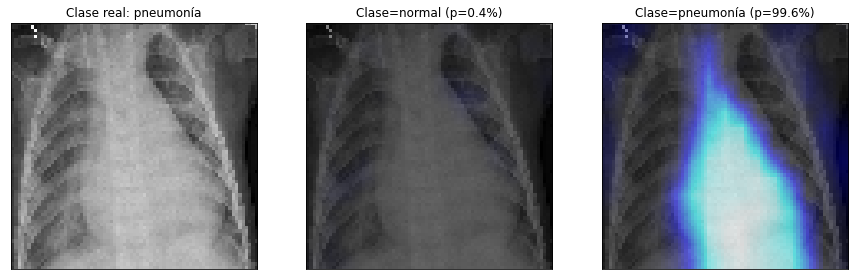

1/1 [==============================] - 0s 13ms/step


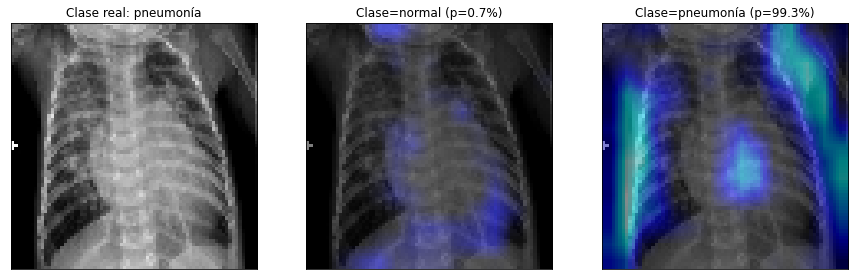

1/1 [==============================] - 0s 13ms/step


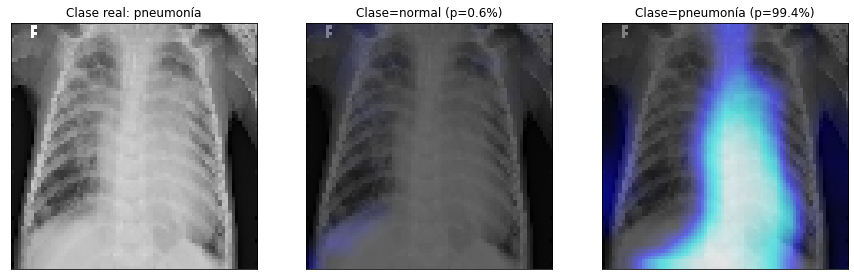

1/1 [==============================] - 0s 13ms/step


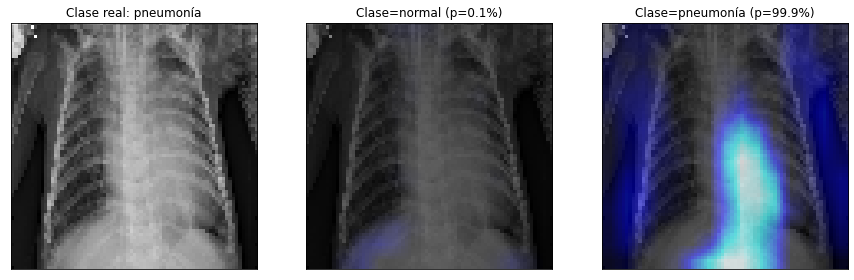

1/1 [==============================] - 0s 13ms/step


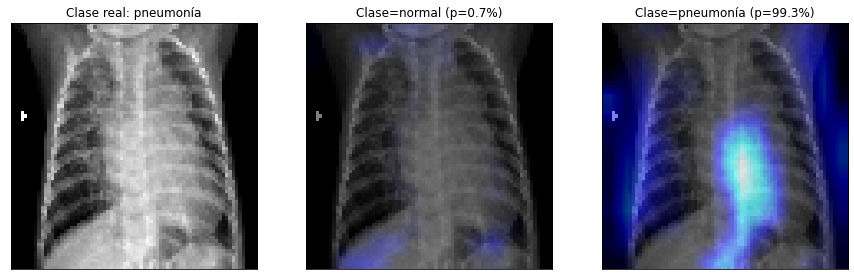

1/1 [==============================] - 0s 13ms/step


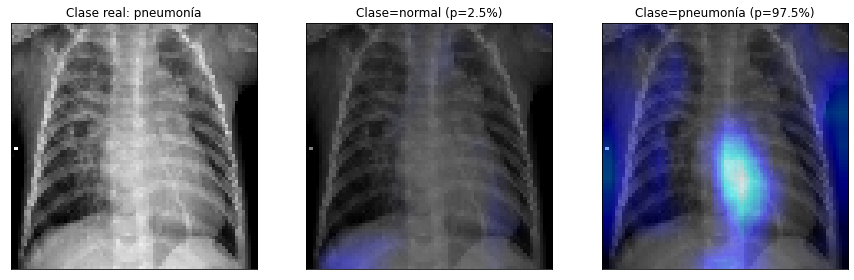

1/1 [==============================] - 0s 13ms/step


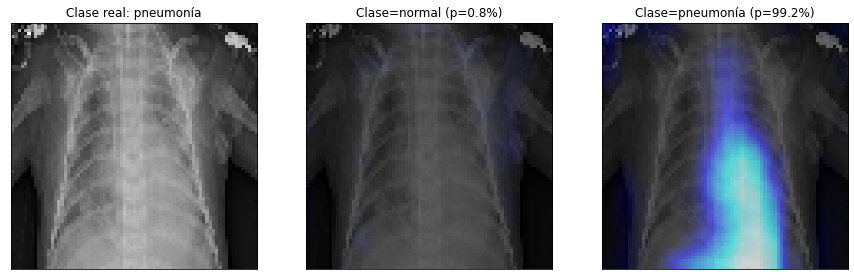

1/1 [==============================] - 0s 13ms/step


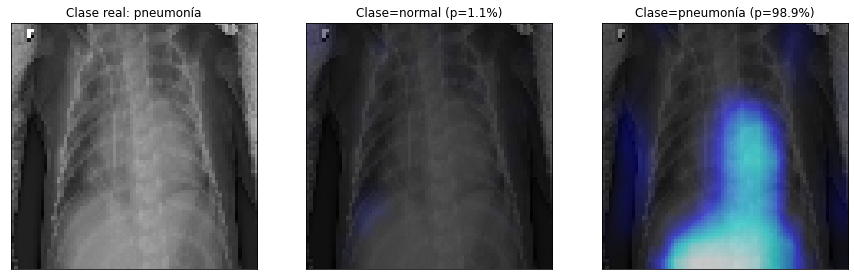

1/1 [==============================] - 0s 13ms/step


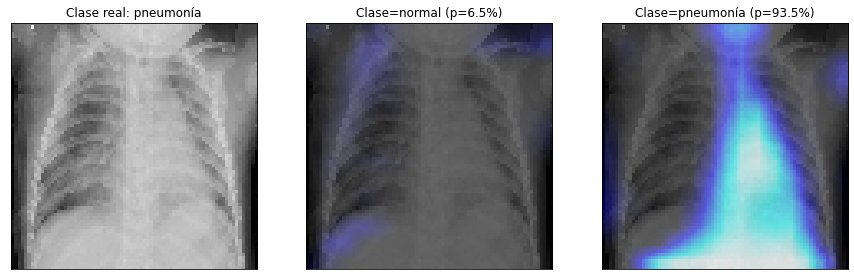

1/1 [==============================] - 0s 13ms/step


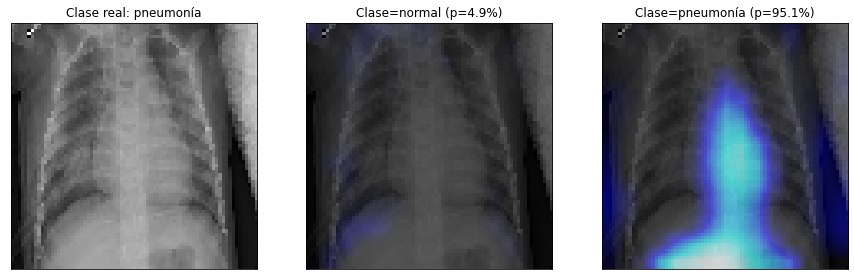

In [ ]:
ind = -20 # visualizamos 10 ejemplos de test a partir de este (en test hay 2002 ejemplos)

for i in range(ind, ind+10):
    (prob0, prob1), im2, superimposed_img0, superimposed_img1 = show_heatmap(model, X_te[i])

    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(im2[:,:,0], vmin=0, vmax=1, cmap="gray"); plt.xticks([]); plt.yticks([])
    if y_te[i][1] == 1:
        plt.title("Clase real: pneumonía")
    else:
        plt.title("Clase real: normal")
    plt.subplot(1,3,2)
    plt.imshow(superimposed_img0, vmin=0, vmax=1); plt.xticks([]); plt.yticks([])
    plt.title("Clase=normal (p={:2.1f}%)".format(100*prob0))
    plt.subplot(1,3,3)
    plt.imshow(superimposed_img1, vmin=0, vmax=1); plt.xticks([]); plt.yticks([])
    plt.title("Clase=pneumonía (p={:2.1f}%)".format(100*prob1))
    plt.show()

## **¿A qué partes de la imagen de entrada es más sensible la salida de la red?**

- **En primer lugar cabe destacar que con los 10 casos de la muestra (que sí tienen neumonía en la realidad) hemos obtenido una probabilidad de sufrirla superior al 93%. Este factor refleja la alta efectividad en la predicción de nuestro modelo.**

- **Todas las zonas de activación (áreas de la imagen en la que se fija la red neuronal para predecir) revelan que el clasificador suele fijarse en zonas externas a los pulmones, que en un principio no contienen información relativa a la enfermedad. Siendo las zonas laterales por fuera de los pulmones las más comunes.**

- **El hecho de no fijarse únicamente en los pulmones no obstaculiza el trabajo del clasificador. Sino que éste todavía arroja una precisión de predicción que aumenta a la vez que el sesgo en la detección de las zonas de activación.**

- **Podríamos decir que el sistema está aprendiendo a fijarse en el entorno, más que en el área de estudio originario. Hecho que tampoco acaba de tirar por tierra la predicciones de su modelo.**

- **Un mayor esfuerzo en optimizar y normalizar las imágenes de entrada, junto con una mayor igualdad en la cantidad de imágenes de cada clase, podrían disminuir el sesgo de las zonas sensibles en las que se fija el modelo para hacer las predicciones.**